In [1]:
%matplotlib inline
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [3]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            print("Interation " + str(i))
            print(" Output: ")
            print(output)
            errors = (y - output)
            print(" Error: ")
            print(errors)
            delta_weight = X.T.dot(errors)
            print(" Delta Weight: ")
            print(delta_weight)
            self.w_[1:] += self.eta * delta_weight
            self.w_[0] += self.eta * errors.sum()
            print(" Updated weight (including W_0:) ")
            print(self.w_)
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [4]:
import pandas as pd

df = pd.read_csv('iris.csv', header=None)

In [8]:
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length and petal length
X = df.iloc[50:150, [0, 2]].values

96405969  0.96330125  0.96264134  0.963779  ]
 Delta Weight: 
[10.1405532  46.88571935]
 Updated weight (including W_0:) 
[0.01636727 0.00121112 0.00828369]
Interation 2
 Output: 
[0.06377845 0.06139504 0.06531407 0.05616319 0.06234452 0.06054726
 0.06293066 0.04963793 0.06246563 0.05497148 0.05141578 0.05830437
 0.05676874 0.06268844 0.05297082 0.06093    0.06042615 0.05735489
 0.06115281 0.05545593 0.06327459 0.05688986 0.0645874  0.06268844
 0.0597383  0.06080889 0.06436459 0.06590022 0.06091059 0.05226356
 0.05450645 0.05367808 0.05569815 0.06588081 0.06018392 0.06091059
 0.06341511 0.06044556 0.05711267 0.05616319 0.05947666 0.06186007
 0.05652652 0.04975904 0.05794104 0.05806215 0.05806215 0.05949608
 0.04739505 0.05723378 0.07369947 0.06563858 0.07383999 0.07038599
 0.07228495 0.08024413 0.05957836 0.07739569 0.07252718 0.07561784
 0.06648637 0.06802199 0.07016318 0.0646891  0.06563858 0.06802199
 0.06979984 0.08119362 0.08285035 0.06505244 0.07194103 0.06373962
 0.08119362 0.06

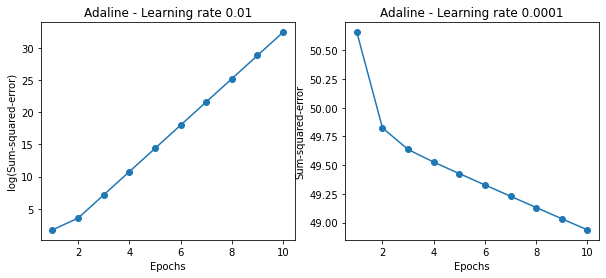

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))


print("========RUN 1==========")

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

print("========RUN 2==========")

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [10]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# Exercise

Now let us use the Adaline model to work with the linearly non-separable dataset from the Perceptron exercise 1. 

Extract only the features of sepal length and petal length (feature column 0 and 2). Choose the last 100 samples from the 150 sample set (Versicolor and Virginica). 

The features need to be standardized. 

Plot the converge graph with an epoch of 20 for learning rate eta=0.01. 


-0.11246362 -0.10706984 -0.49448257 -0.82451823 -0.64699321  0.45786792
 -0.07126789  0.05966762  0.00229054 -1.43260625 -1.05598108 -0.64699321
 -0.43171171 -0.31156377 -0.39590976 -0.3331389  -0.85688093 -0.70976407
 -0.12864497  0.24258642 -0.52684527 -0.45868063 -0.45868063 -0.24879291
  0.70355758 -0.32774512 -0.40653188  0.43106446  0.26972079  0.11721015
 -0.00833157 -0.30600454  0.6031957  -0.11769195  0.12799771  0.07601442
  0.90821697  0.57818131  0.58896888  0.49383532  0.43106446  0.57818131
  0.38447495 -0.3687754  -0.63064641  0.69832925  0.39526251  0.55660618
 -0.3687754   1.0337587   0.25893322  0.20694993  1.09652956  0.89742941
  0.18537479  0.46882094  0.21234371  0.16036041  0.18537479  0.77188768
 -0.01911914  0.41683764  0.11721015  0.3163103   0.96020027  0.78806903
  0.38986873  1.18087555  0.43106446  0.06522685  0.25893322  0.91361075
  0.90282319  0.77728147  0.31091652  0.4992291 ]
 Delta Weight: 
[5.27829664 8.33126379]
 Updated weight (including W_0:) 
[

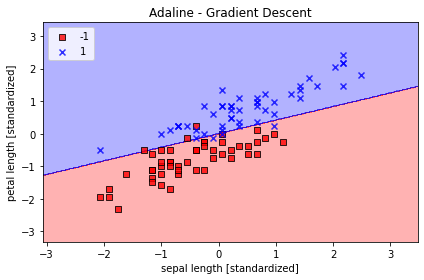

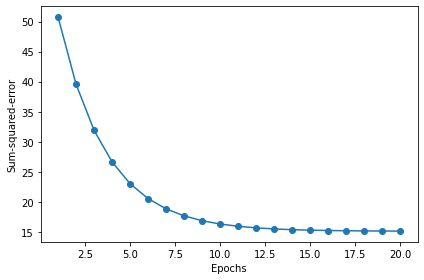

In [11]:


ada = AdalineGD(n_iter=20, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()